In [38]:
from scipy.optimize import linprog
from IPython.core.display import Image, display
! pip install pulp
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy

Defaulting to user installation because normal site-packages is not writeable


In [39]:
obj = [-1, -2]
#      ─┬  ─┬
#       │   └┤ Coefficient for y
#       └────┤ Coefficient for x

lhs_ineq = [[ 2,  1],[-4,  5],[ 1, -2]]  # Red constraint left side , Blue constraint left side, Yellow constraint left side

rhs_ineq = [20, 10, 2]  # Red constraint right side # Blue constraint right side # Yellow constraint right side

lhs_eq = [[-1, 5]]  # Green constraint left side
rhs_eq = [15]       # Green constraint right side
bnd = [(0, float("inf")),  # Bounds of x
        (0, float("inf"))]  # Bounds of y
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,method="revised simplex")
opt

     con: array([0.])
     fun: -16.818181818181817
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.        , 18.18181818,  3.36363636])
  status: 0
 success: True
       x: array([7.72727273, 4.54545455])

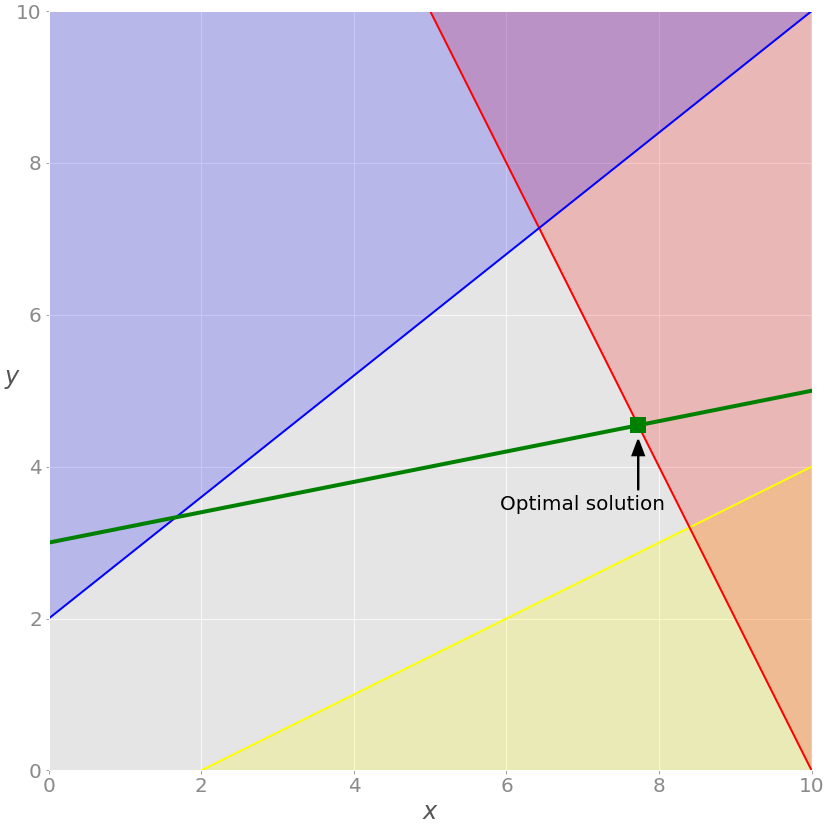

In [42]:
display(Image(filename='lp-py-fig-5.png'))

In [43]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: -20.714285714285715
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.        , 0.        , 9.85714286])
  status: 0
 success: True
       x: array([6.42857143, 7.14285714])

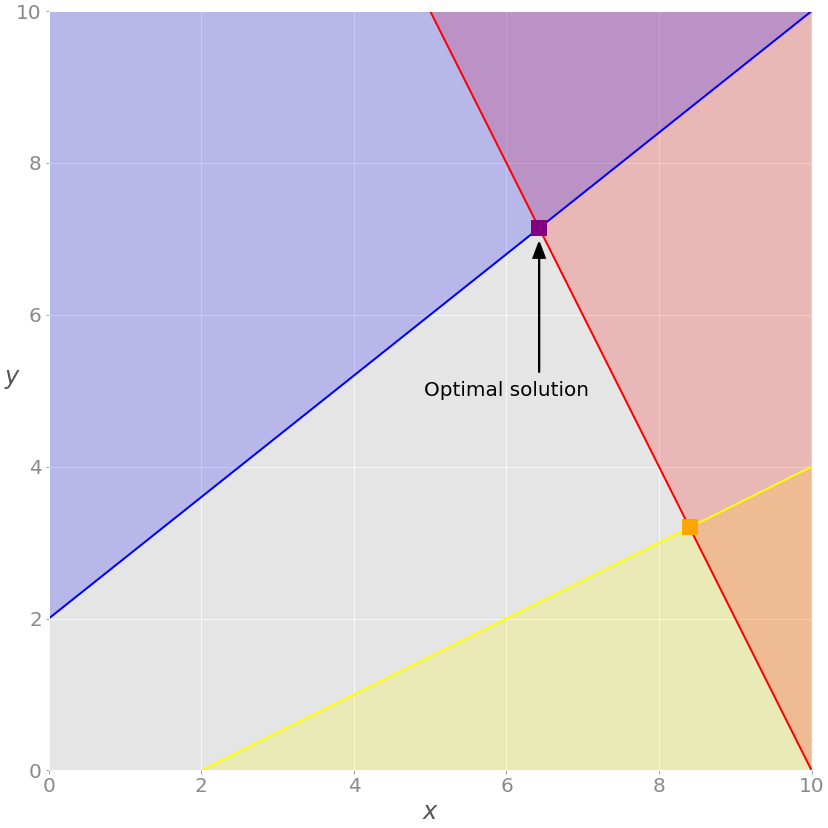

In [44]:
display(Image(filename='lp-py-fig-4.png'))

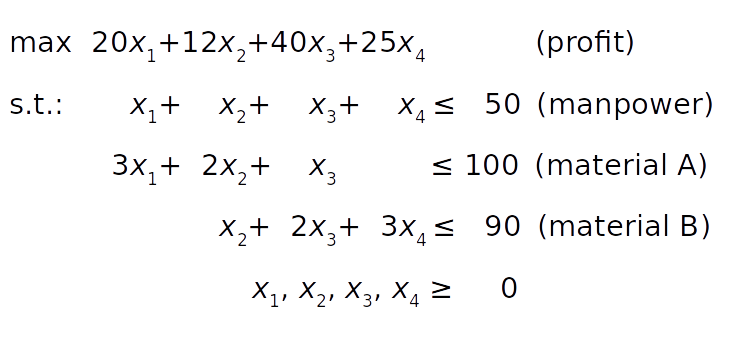

In [45]:
display(Image(filename='lp-py-eq-4.png'))

In [46]:
obj = [-20, -12, -40, -25]
lhs_ineq = [[1, 1, 1, 1],[3, 2, 1, 0],[0, 1, 2, 3]]
rhs_ineq = [ 50, 100, 90]
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: -1900.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0., 40.,  0.])
  status: 0
 success: True
       x: array([ 5.,  0., 45.,  0.])

In [49]:
from pulp import *
problem = LpProblem("problemName", LpMaximize)

# factory cost per day
cost_factory_0 = 450
cost_factory_1 = 420
cost_factory_2 = 400

# factory throughput per day
factory_0 = 2000
factory_1 = 1500
factory_2 = 1000

# production goal
production_goal = 80000

# time limit
max_num_days = 19

num_factories = 3
factory_days = LpVariable.dicts("factoryDays", list(range(num_factories)), 0, max_num_days, cat="Continuous")

# goal constraint
c1 = factory_days[0]*factory_0 + factory_days[1]*factory_1 + factory_days[2] * factory_2 >= production_goal

# additional production constraints
c2 = factory_days[0]*factory_0 <= 2*factory_days[1]*factory_1
c3 = factory_days[0]*factory_0 <= 2*factory_days[2]*factory_2
c4 = factory_days[1]*factory_1 <= 2*factory_days[2]*factory_2
c5 = factory_days[1]*factory_1 <= 2*factory_days[0]*factory_0
c6 = factory_days[2]*factory_2 <= 2*factory_days[1]*factory_1
c7 = factory_days[2]*factory_2 <= 2*factory_days[0]*factory_0

# adding the constraints to the problem
problem += c1
problem += c2
problem += c3
problem += c4
problem += c5
problem += c6
problem += c7

# objective function
problem += -factory_days[0]*cost_factory_0*factory_0 - factory_days[1]*cost_factory_1*factory_1 - factory_days[2]*cost_factory_2*factory_2
print(problem)
# solving
problem.solve()

for i in range(3):
    print(f"Factory {i}: {factory_days[i].varValue}")

problemName:
MAXIMIZE
-900000*factoryDays_0 + -630000*factoryDays_1 + -400000*factoryDays_2 + 0
SUBJECT TO
_C1: 2000 factoryDays_0 + 1500 factoryDays_1 + 1000 factoryDays_2 >= 80000

_C2: 2000 factoryDays_0 - 3000 factoryDays_1 <= 0

_C3: 2000 factoryDays_0 - 2000 factoryDays_2 <= 0

_C4: 1500 factoryDays_1 - 2000 factoryDays_2 <= 0

_C5: - 4000 factoryDays_0 + 1500 factoryDays_1 <= 0

_C6: - 3000 factoryDays_1 + 1000 factoryDays_2 <= 0

_C7: - 4000 factoryDays_0 + 1000 factoryDays_2 <= 0

VARIABLES
factoryDays_0 <= 19 Continuous
factoryDays_1 <= 19 Continuous
factoryDays_2 <= 19 Continuous

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ahillman89/.local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/6c244a701a2d4263870e16baa5cad9f6-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/6c244a701a2d4263870e16baa5cad9f6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At